<h1><b><font color = black><a id='division_ID0'>2001 - 2010 INDIA FRAUD STATISTICS</a></font></b></h1><br>
<b>Built by Arijit Roy, Arkadeep Roy, Soumodip Ghosh, Ankita Datta, Shayani Das</b>
<br><b>Guidance - Indranil Das, Technical Analyst, Webskitters Academy</b>
<br><b>In Association with Webskitters Academy</b>
<br><b>Hooghly Engineering & Technology College</b>

<p><b>Download Dataset Dependency - <a href = "https://drive.google.com/drive/folders/1t3_bMxtiEDqFa1xMQFCkl_vcZFEQB1lZ?usp=sharing">Click here</a></b></p>

<h3><b>Contents</b></h3>

[Data Collection](#division_ID1) | [Data Preprocessing](#division_ID2) | [Data Visualization](#division_ID3)

<h2><a id='division_ID1'>Data Collection</a></h2>

[MENU](#division_ID0)

In [1]:
# import dataset from local repository
import pandas as pd
df = pd.read_csv('serious_fraud.csv')
df

,Area_Name,Year,Group_Name,Sub_Group_Name,Loss_of_Property_1_10_Crores,Loss_of_Property_10_25_Crores,Loss_of_Property_25_50_Crores,Loss_of_Property_50_100_Crores,Loss_of_Property_Above_100_Crores
0,Andhra Pradesh,2001,Serious Fraud - Cheating,2. Cheating,4.0,0.0,0.0,0.0,0.0
1,Arunachal Pradesh,2001,Serious Fraud - Cheating,2. Cheating,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Serious Fraud - Cheating,2. Cheating,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Serious Fraud - Cheating,2. Cheating,0.0,0.0,0.0,0.0,0.0
4,Chandigarh,2001,Serious Fraud - Cheating,2. Cheating,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
443,Odisha,2010,Serious Fraud - Criminal Breach of Trust,1. Criminal Breach of Trust,0.0,0.0,0.0,0.0,0.0
444,Punjab,2010,Serious Fraud - Criminal Breach of Trust,1. Criminal Breach of Trust,2.0,NaN,NaN,NaN,NaN
445,Tamil Nadu,2010,Serious Fraud - Criminal Breach of Trust,1. Criminal Breach of Trust,9.0,0.0,0.0,0.0,0.0
446,Uttar Pradesh,2010,Serious Fraud - Criminal Breach of Trust,1. Criminal Breach of Trust,3.0,0.0,NaN,0.0,0.0


<h2><a id='division_ID2'>Data Preprocessing</a></h2>

[MENU](#division_ID0)

In [2]:
# check null values in the dataset
df.isnull().sum()

Area_Name                             0
Year                                  0
Group_Name                            0
Sub_Group_Name                        0
Loss_of_Property_1_10_Crores          4
Loss_of_Property_10_25_Crores        62
Loss_of_Property_25_50_Crores        66
Loss_of_Property_50_100_Crores       69
Loss_of_Property_Above_100_Crores    71
dtype: int64

In [3]:
# fill the null values with 0
df.fillna(0, inplace = True)

In [4]:
# drop unneccesary columns
df.drop(['Group_Name', 'Sub_Group_Name'], axis = 1, inplace = True)

In [5]:
# change datatypes to int
df.iloc[:, -5] = df.iloc[:, -5].astype(int)
df.iloc[:, -4] = df.iloc[:, -4].astype(int)
df.iloc[:, -3] = df.iloc[:, -3].astype(int)
df.iloc[:, -2] = df.iloc[:, -2].astype(int)
df.iloc[:, -1] = df.iloc[:, -1].astype(int)

<h2><a id='division_ID3'>Data Visualization</a></h2>

[MENU](#division_ID0)

- <h3><b>2001 - 2010 Total Fraud Comparison Statewise</b></h3>

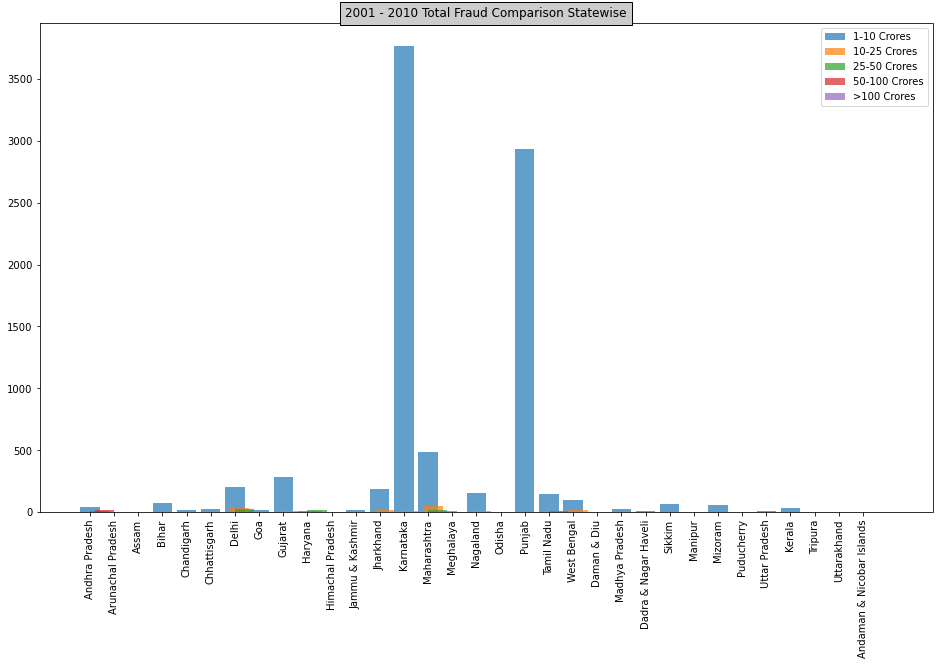

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
area = df.iloc[:, 0].unique()
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
r = np.arange(len(area))
w = 0.2
for i in area:
    new = df[df.iloc[:, 0] == i].copy()
    cat1.append(new.iloc[:, -5].sum())
    cat2.append(new.iloc[:, -4].sum())
    cat3.append(new.iloc[:, -3].sum())
    cat4.append(new.iloc[:, -2].sum())
    cat5.append(new.iloc[:, -1].sum())
plt.figure(figsize = (16, 9))
plt.bar(r, cat1, alpha = .7)
plt.bar(r+w, cat2, alpha = .7)
plt.bar(r+w*2, cat3, alpha = .7)
plt.bar(r+w*3, cat4, alpha = .7)
plt.bar(r+w*4, cat5, alpha = .7)
plt.xticks(r, area, rotation = 90)
plt.legend(['1-10 Crores', '10-25 Crores', '25-50 Crores', '50-100 Crores', '>100 Crores'], loc = 'best')
plt.title('2001 - 2010 Total Fraud Comparison Statewise', bbox = {'facecolor': '0.8', 'pad': 5}, loc = 'center')
plt.show()

- <h3><b>2001 - 2010 Yearwise Fraud Comparison Statewise</b></h3>

In [7]:
def plot_details(state):
    timeline = df.iloc[:, 1].unique()
    new = df[df.iloc[:, 0] == state].copy()
    r = np.arange(len(timeline))
    w = 0.1
    cat1 = []
    cat2 = []
    cat3 = []
    cat4 = []
    cat5 = []
    for i in timeline:
        new1 = new[new.iloc[:, 1] == i].copy()
        cat1.append(new1.iloc[:, -5].sum())
        cat2.append(new1.iloc[:, -4].sum())
        cat3.append(new1.iloc[:, -3].sum())
        cat4.append(new1.iloc[:, -2].sum())
        cat5.append(new1.iloc[:, -1].sum())
    if (sum(cat1) + sum(cat2) + sum(cat3) + sum(cat4) + sum(cat5)) == 0:
        return
    plt.figure(figsize = (16, 9))
    plt.bar(r, cat1, alpha = .7, width = w)
    plt.bar(r+w, cat2, alpha = .7, width = w)
    plt.bar(r+w*2, cat3, alpha = .7, width = w)
    plt.bar(r+w*3, cat4, alpha = .7, width = w)
    plt.bar(r+w*4, cat5, alpha = .7, width = w)
    plt.xticks(r+w*2, timeline, rotation = 90)
    plt.legend(['1-10 Crores', '10-25 Crores', '25-50 Crores', '50-100 Crores', '>100 Crores'], loc = 'best')
    plt.title(state + ' 2001 - 2010 Yearwise Fraud Statistics', bbox = {'facecolor': '0.8', 'pad': 5}, loc = 'center')
    plt.show()

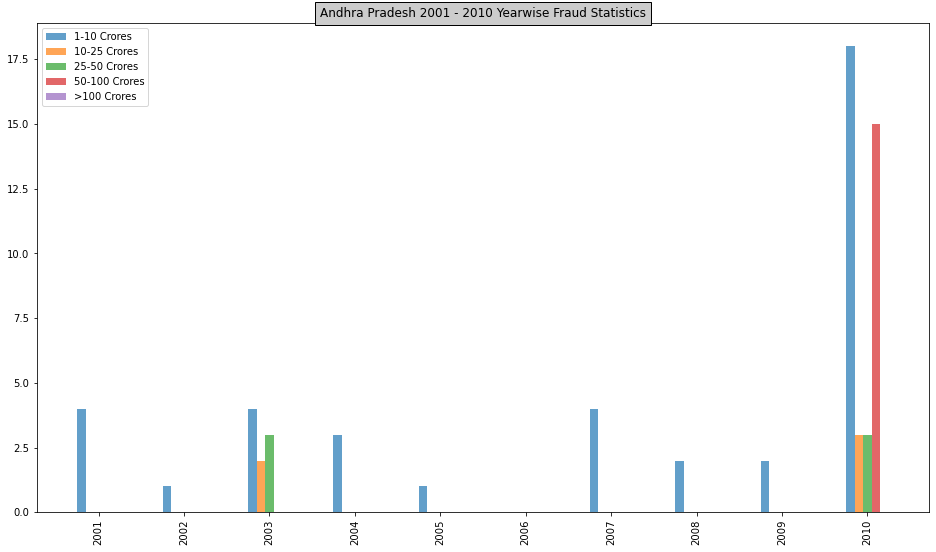

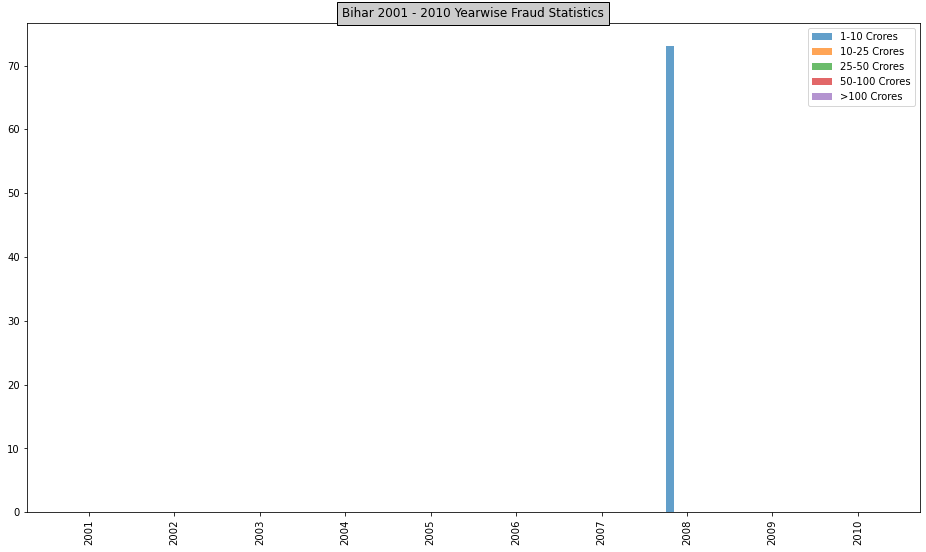

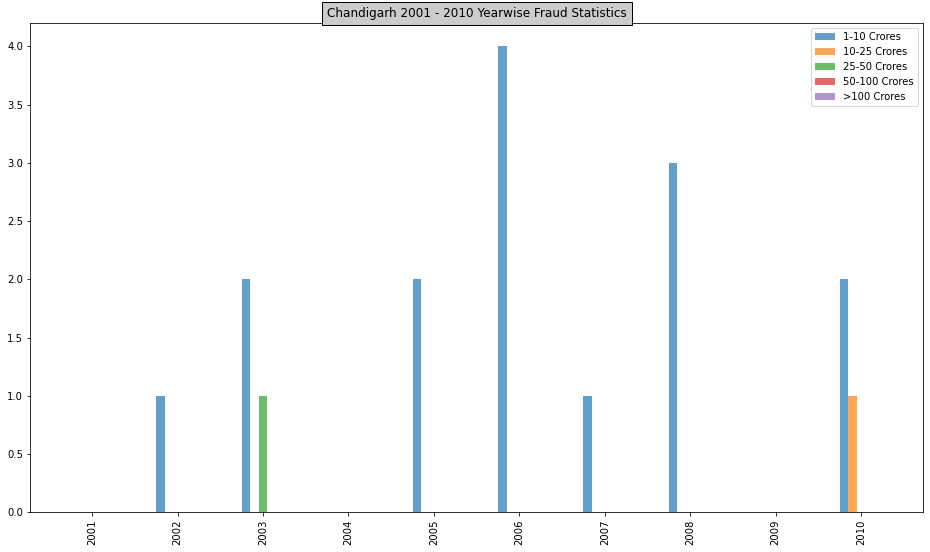

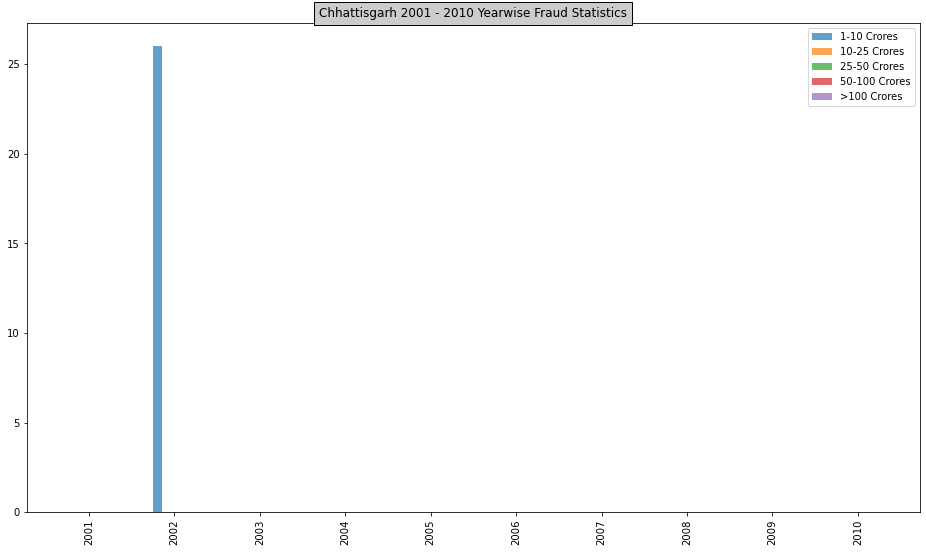

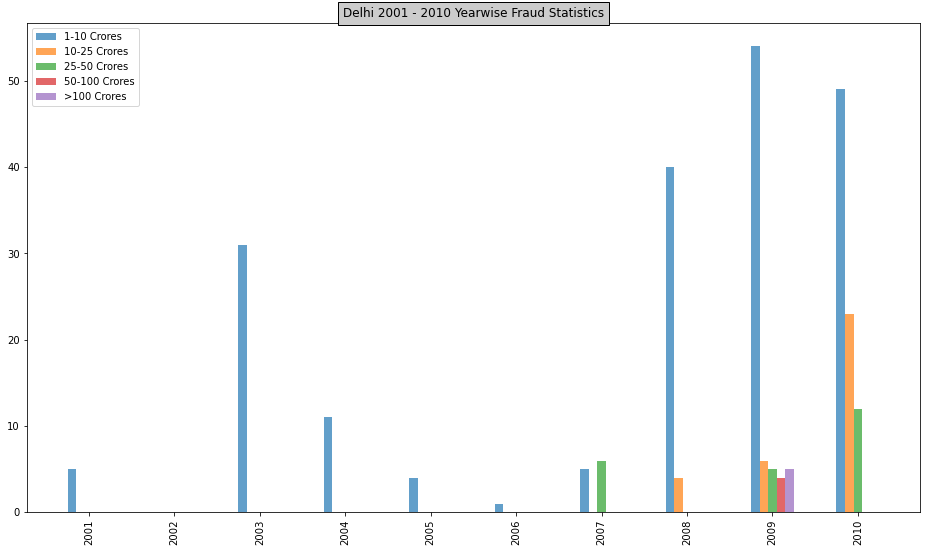

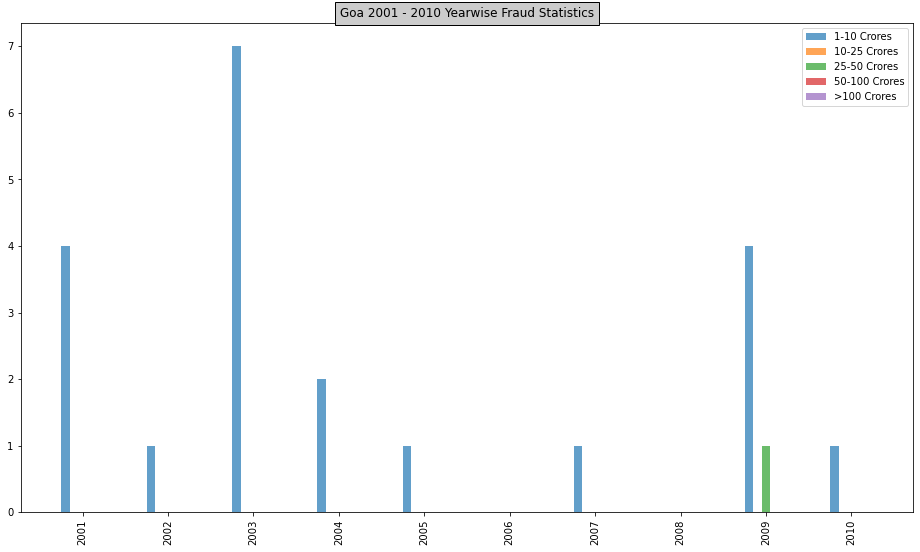

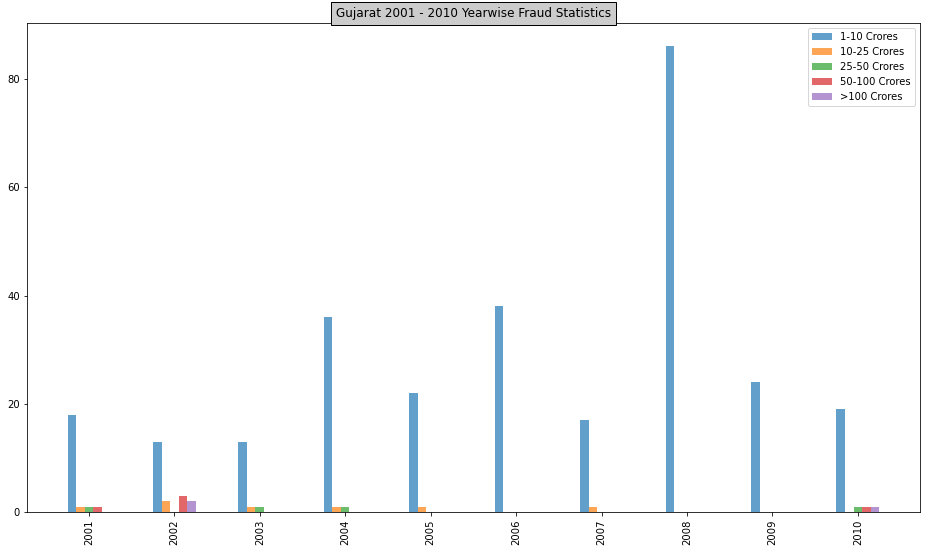

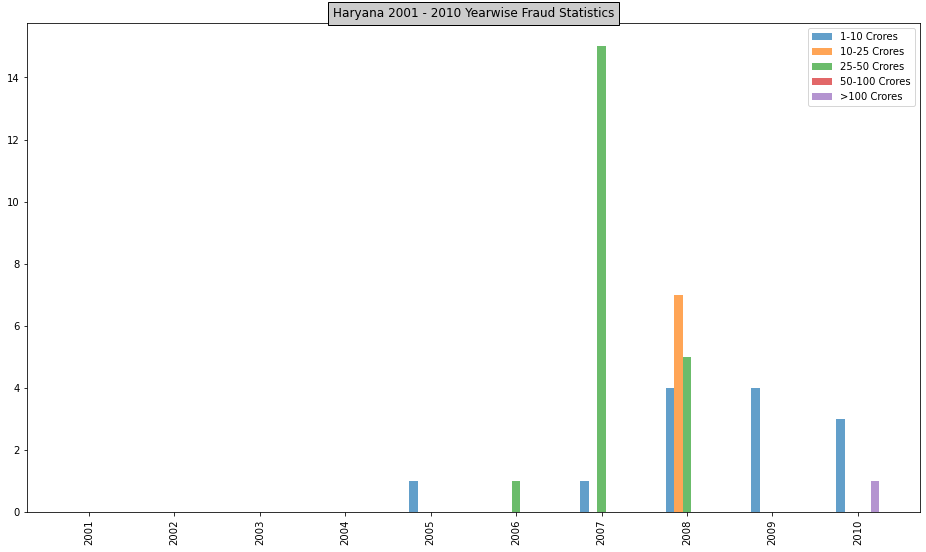

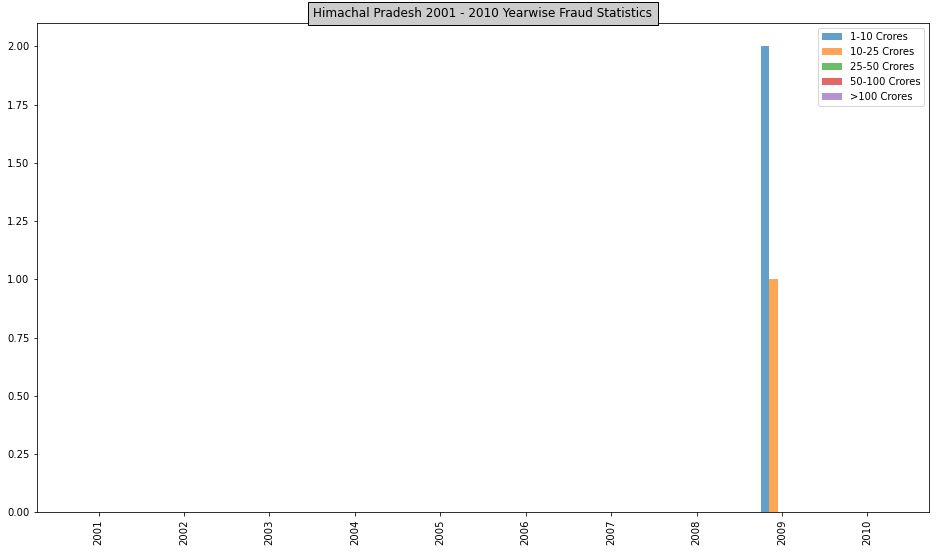

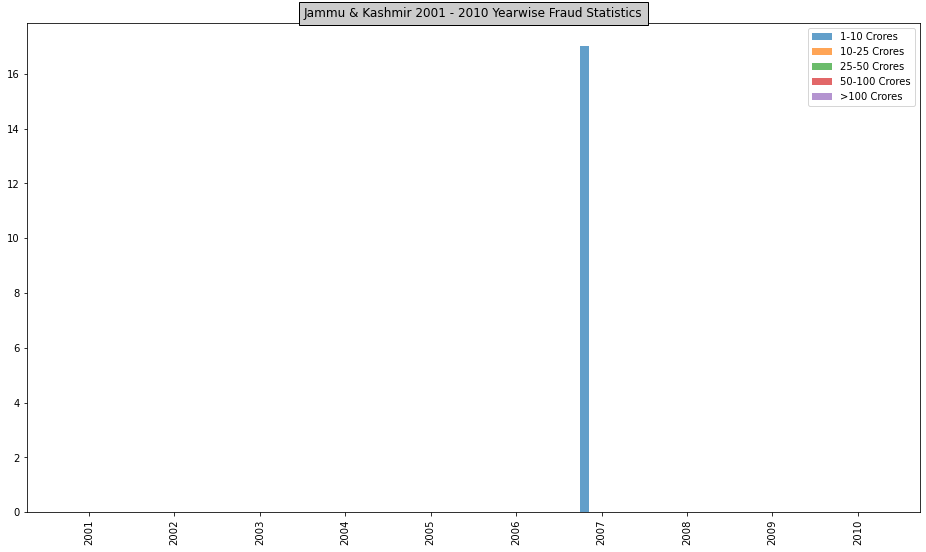

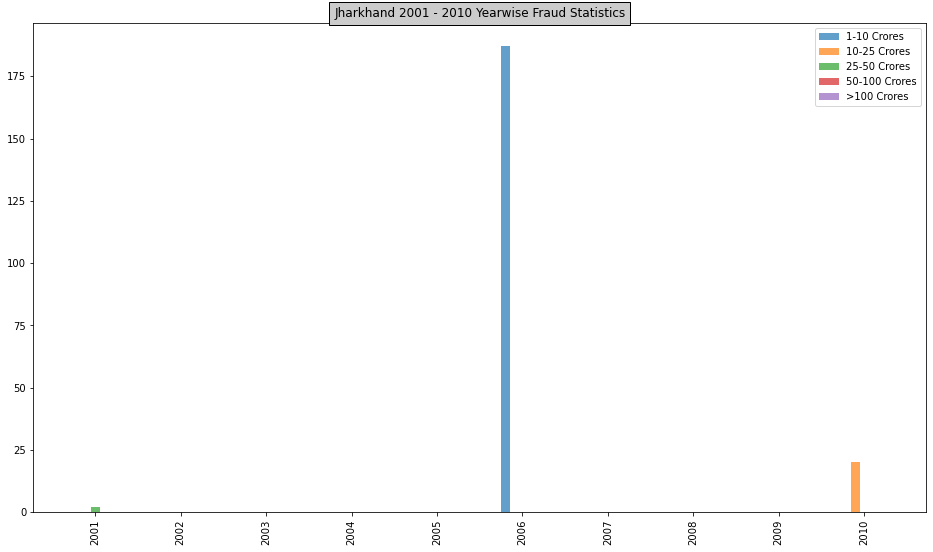

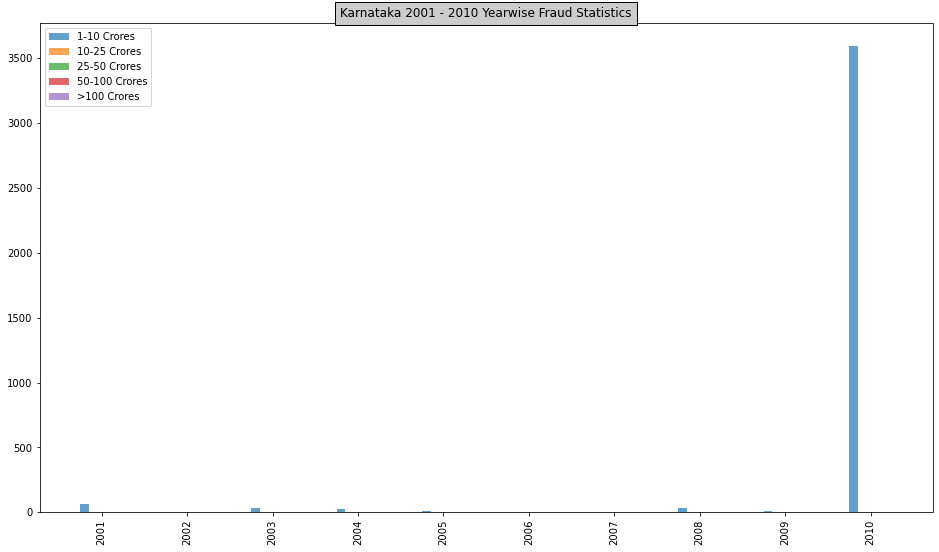

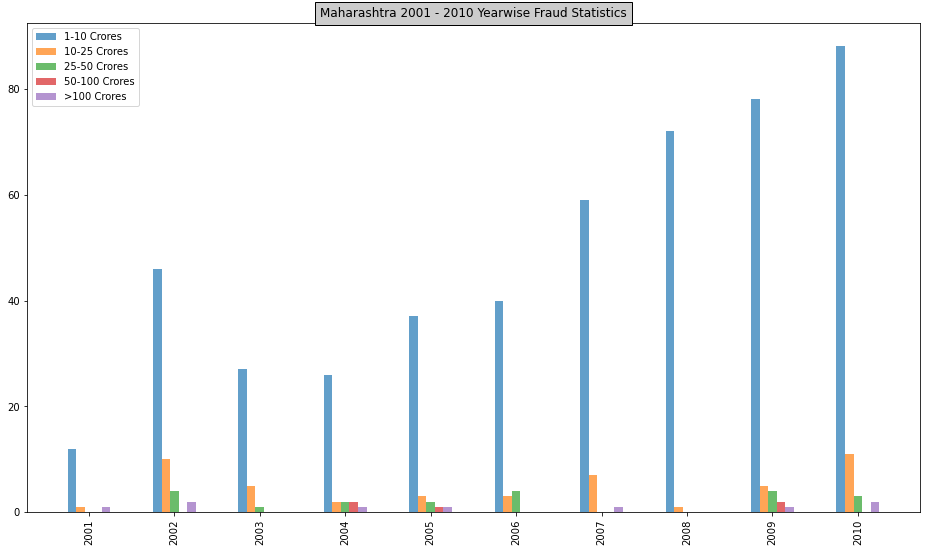

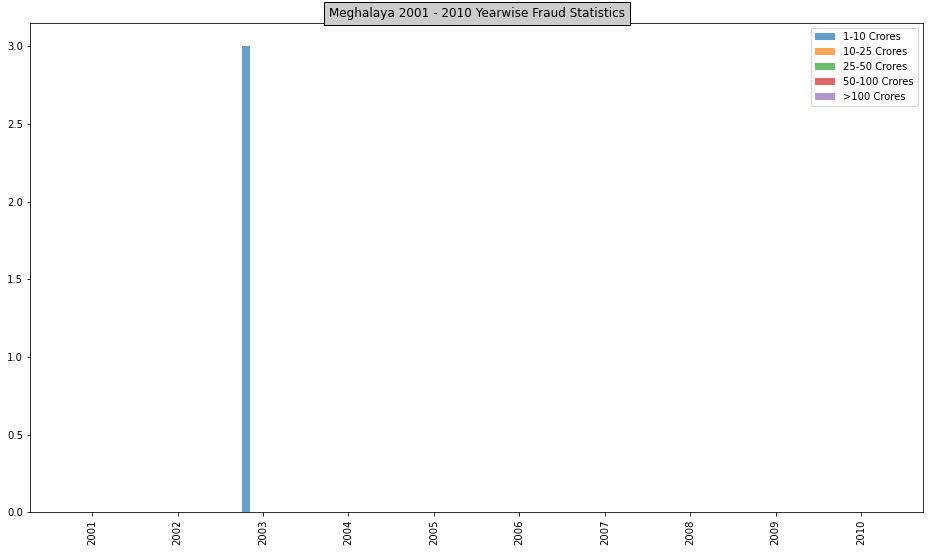

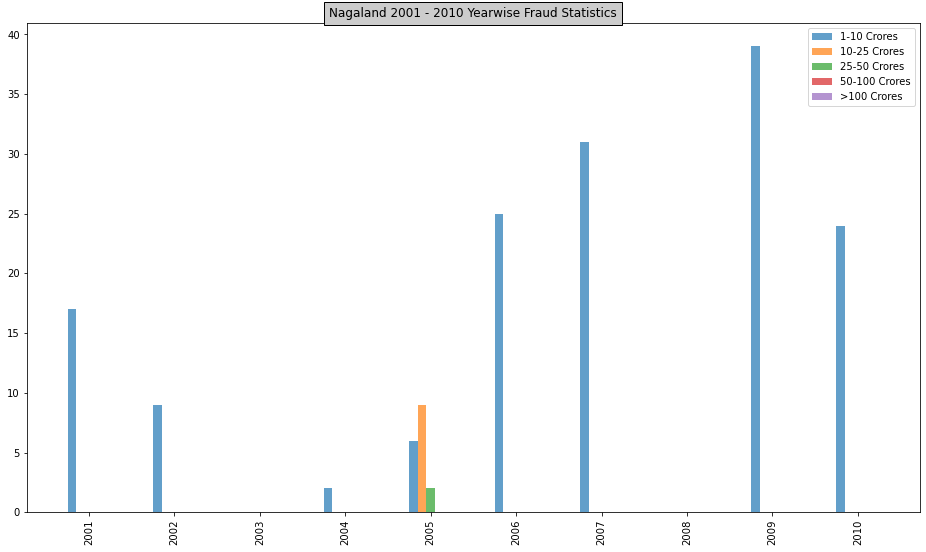

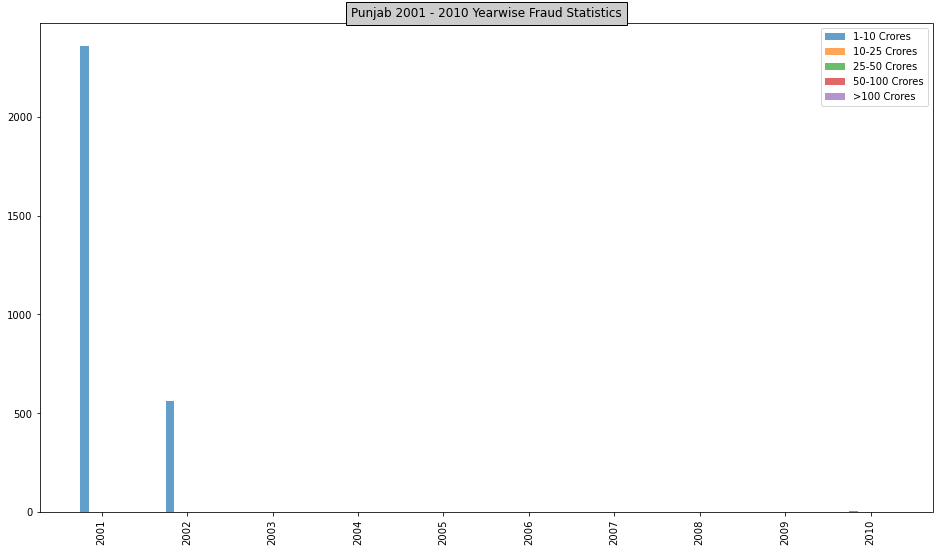

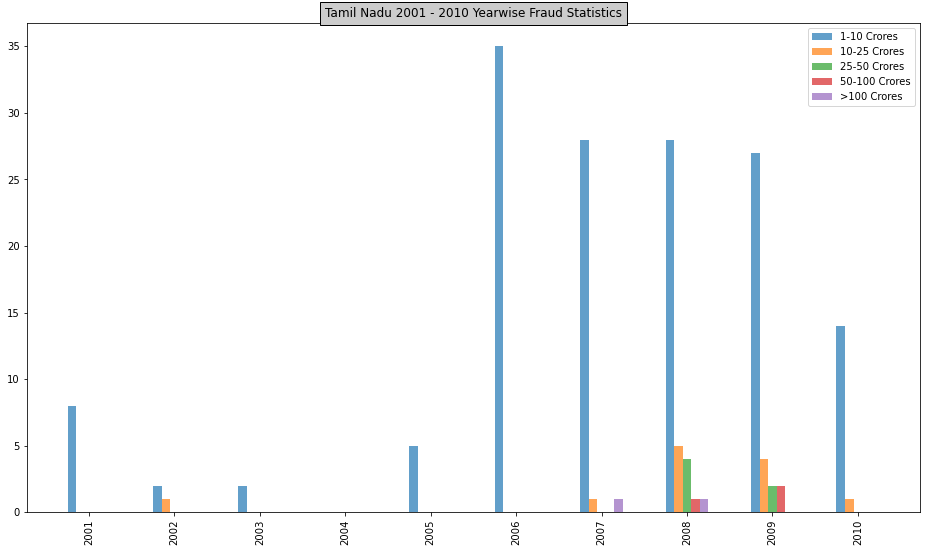

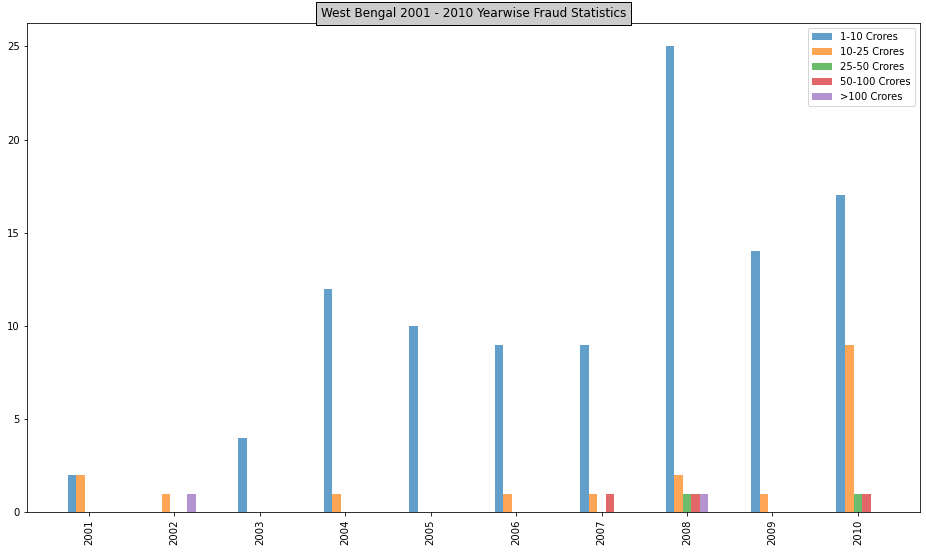

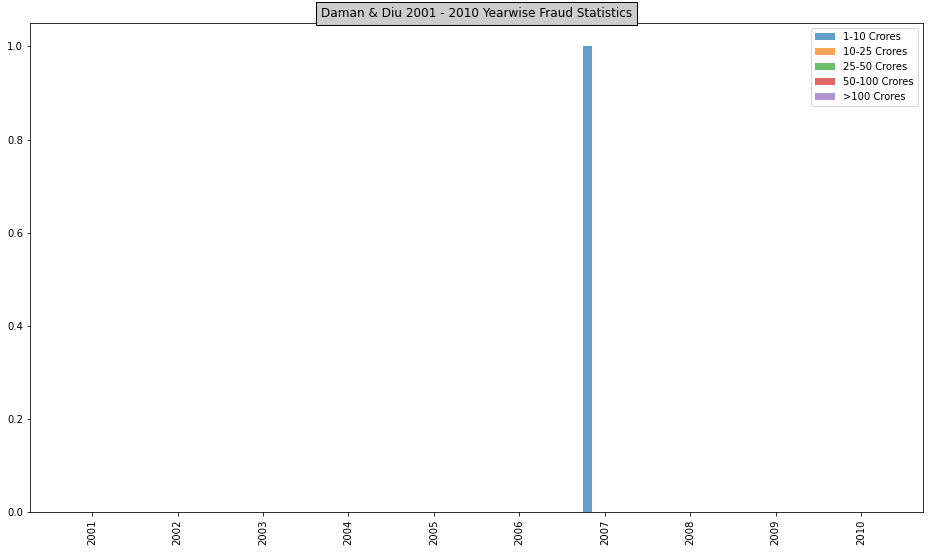

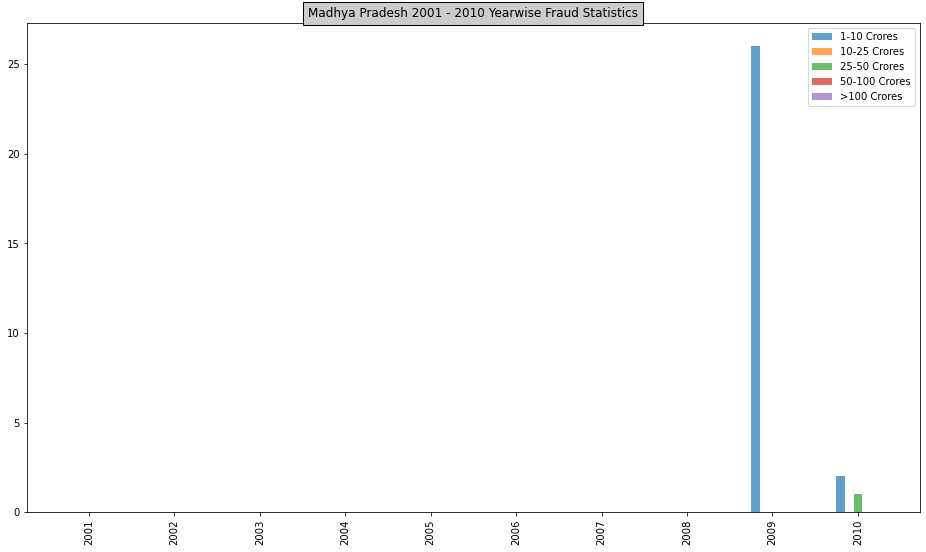

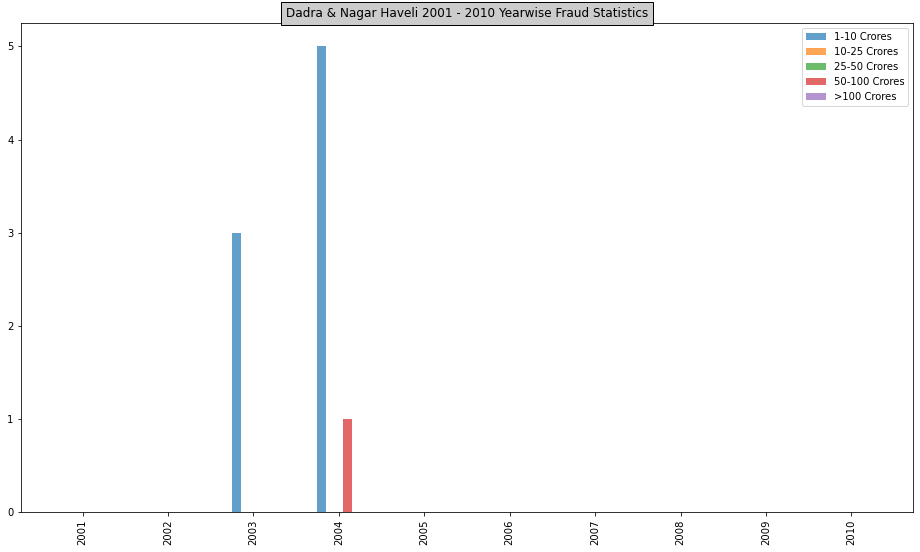

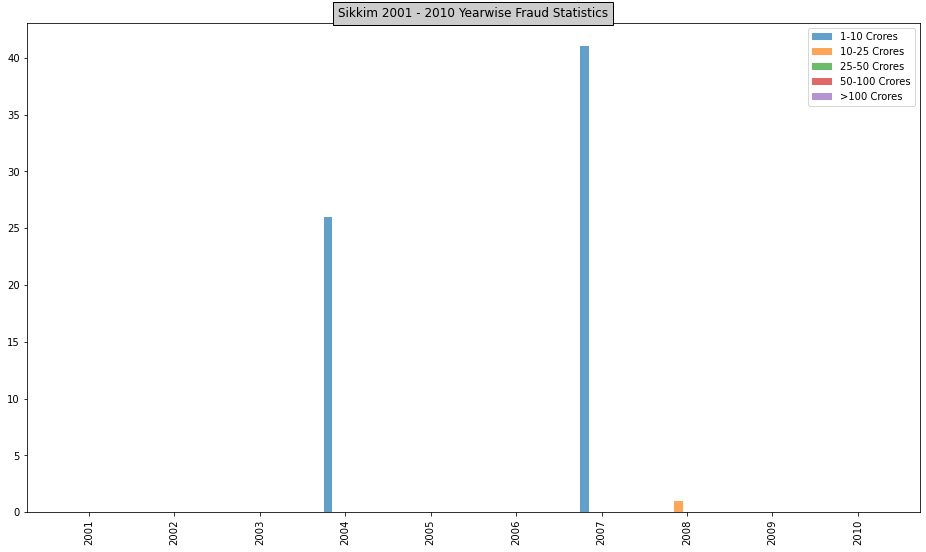

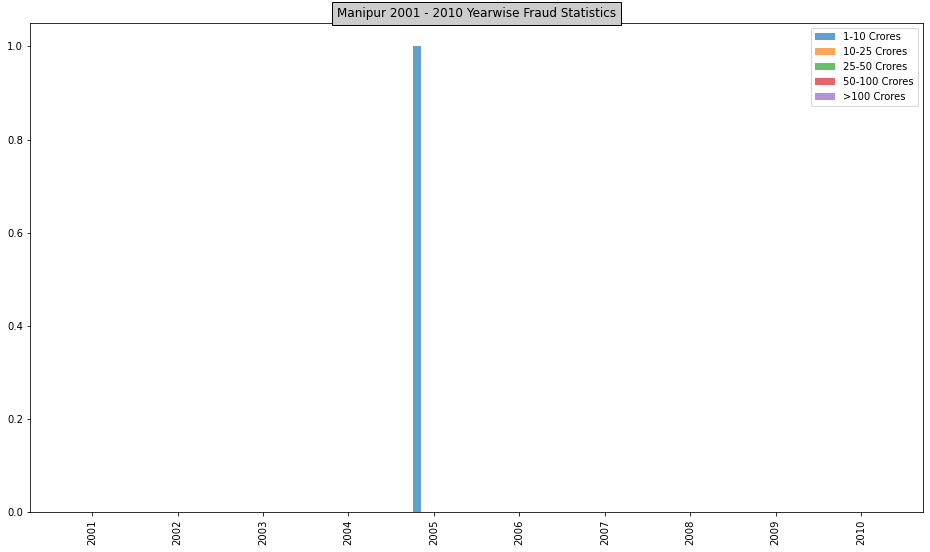

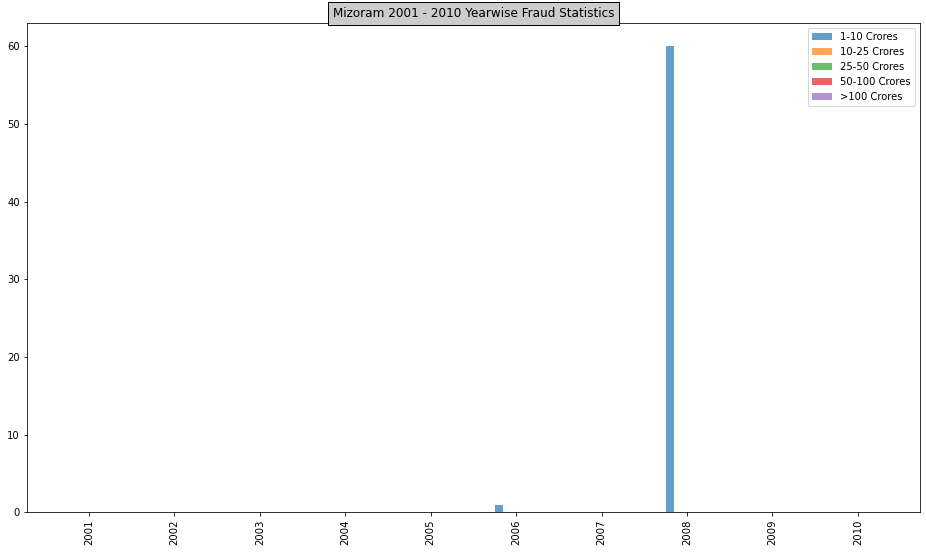

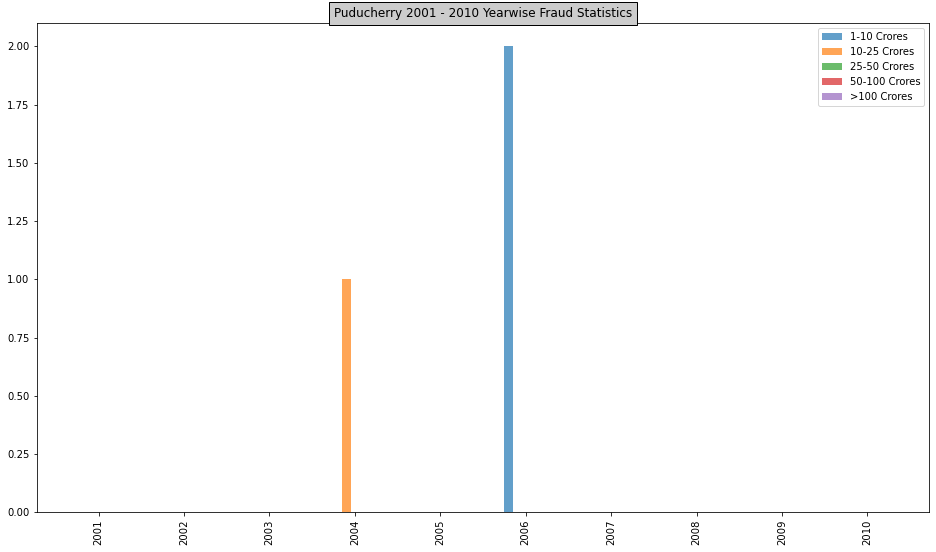

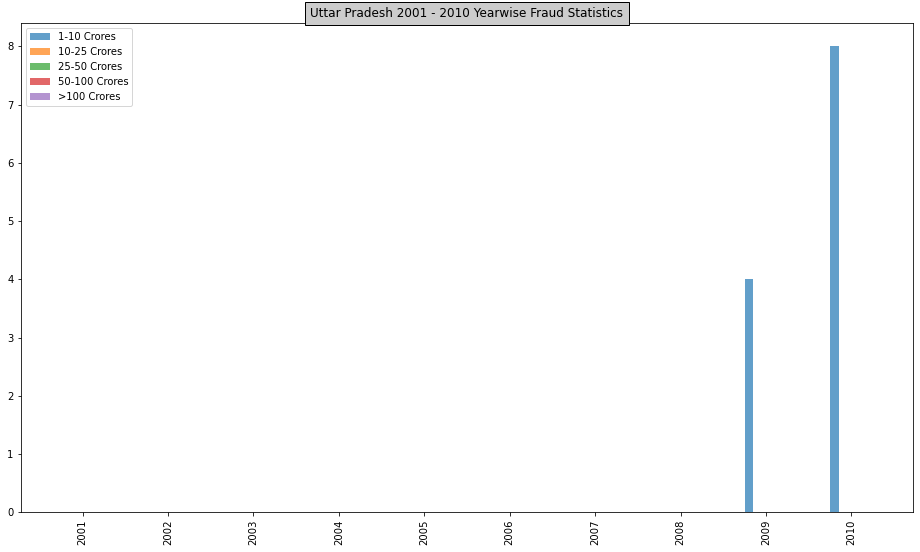

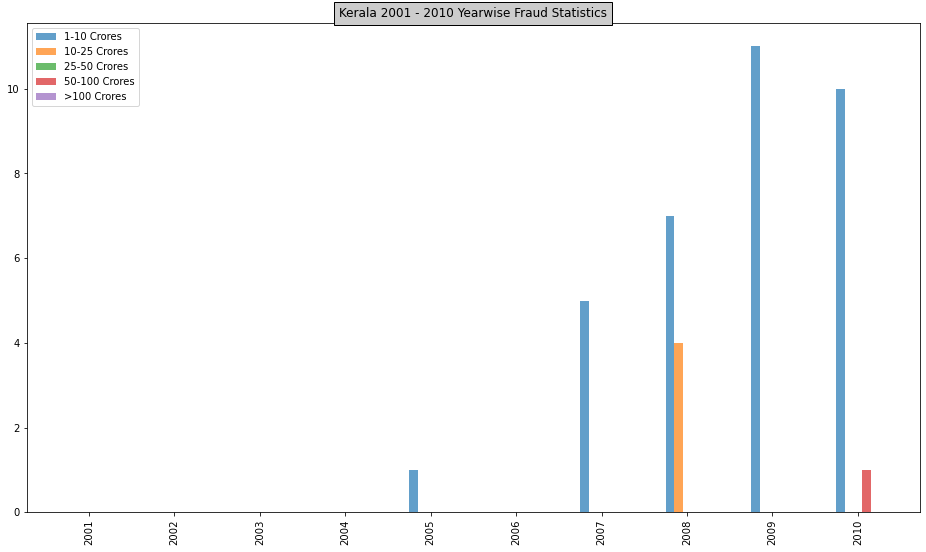

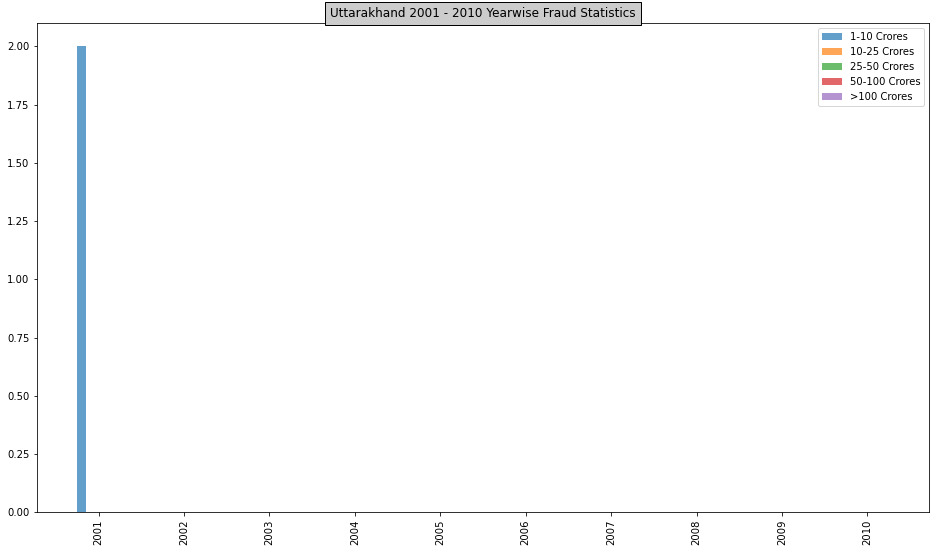

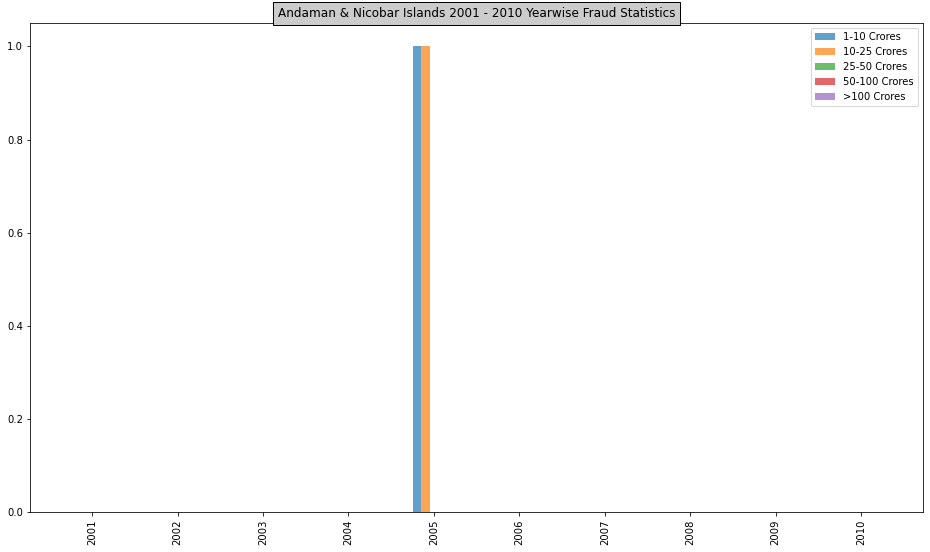

In [8]:
for i in area:
    plot_details(i)

- <h3><b>2001 - 2010 Frequency of Frauds and Its Categories</b></h3>

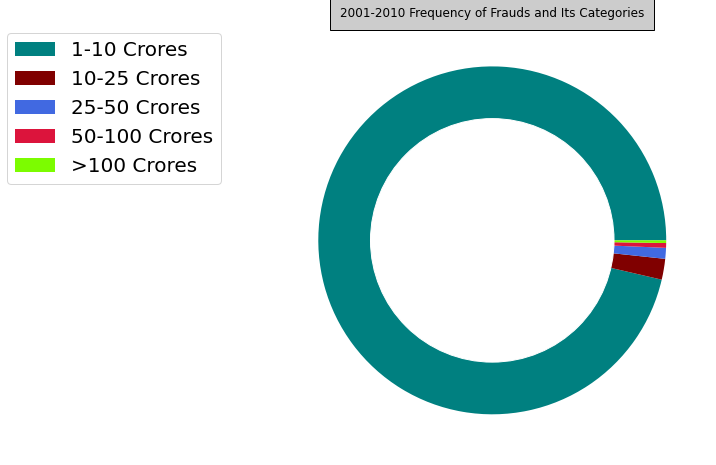

In [9]:
import random
cat_freq = []
for i in range(2, len(list(df.columns))):
    cat_freq.append(df.iloc[:, i].sum())
colors = ['teal', 'maroon', 'royalblue', 'crimson', 'lawngreen']
plt.figure(figsize = (8, 8))
plt.title('2001-2010 Frequency of Frauds and Its Categories', bbox={'facecolor':'0.8', 'pad':10}, loc = 'center')
plt.pie(cat_freq, colors = colors)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(['1-10 Crores', '10-25 Crores', '25-50 Crores', '50-100 Crores', '>100 Crores'], loc = 'upper right', bbox_to_anchor = (-0.1, 1.), fontsize=20)
plt.show()

- <h3><b>2001 - 2010 Frequency of Frauds Statewise</b></h3>

In [10]:
freq = []
for i in area:
    f = df[df.iloc[:, 0] == i].iloc[:, -5].sum()
    freq.append(f)

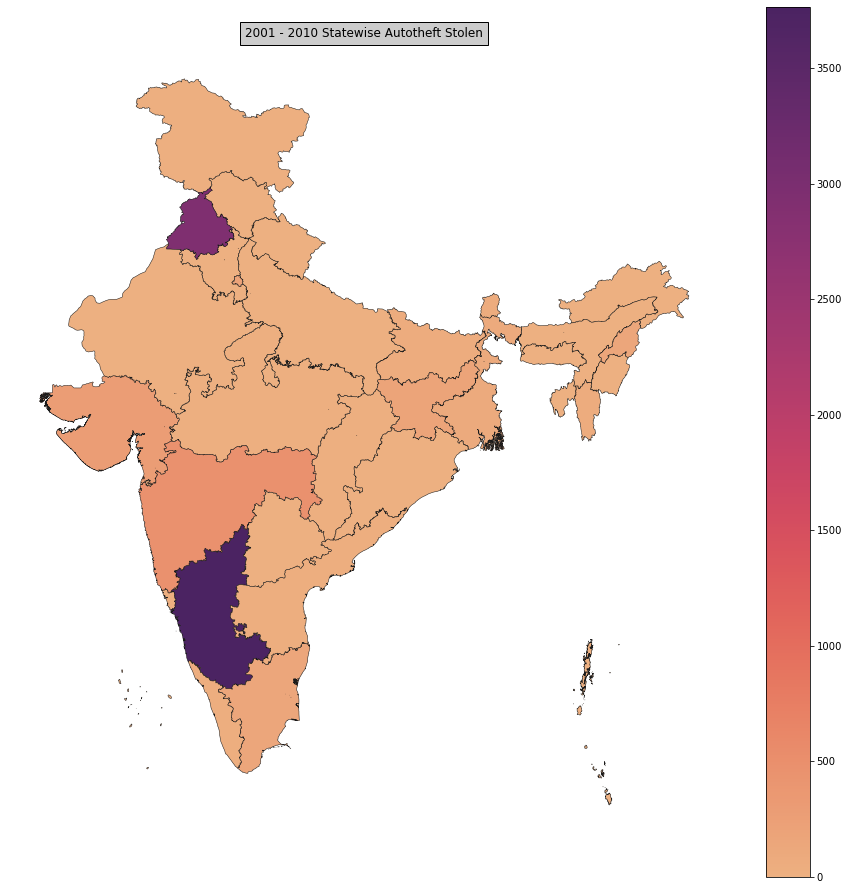

In [11]:
import geopandas as gpd
df = pd.DataFrame(list(zip(area, freq)), columns = ['Area_Name', 'Frequency'])
map_file = gpd.read_file('Indian_States.shp')
merged = map_file.set_index('st_nm').join(df.set_index('Area_Name'))
na = ['Andaman & Nicobar Island', 'Arunanchal Pradesh', 'Dadara & Nagar Havelli', 
      'NCT of Delhi', 'Telangana', 'Rajasthan', 'Lakshadweep']
val = [1, 0, 8, 200, 0, 0, 0]
j = 0
for i in na:
    merged.at[i, list(merged.columns)[1]] = val[j]
    j += 1
merged.iloc[:, -1] = merged.iloc[:, -1].astype(int)
fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
ax.set_title('2001 - 2010 Statewise Autotheft Stolen', bbox={'facecolor':'0.8', 'pad':5}, loc = 'center')
fig = merged.plot(column='Frequency', cmap='flare', linewidth=0.5, ax=ax, edgecolor='0.1',legend=True)

<center>For further information or query mail us at <a href = "mailto: aroy02072000@gmail.com">aroy02072000@gmail.com</a></center>


<br><center>&copy; All rights reserved by Webskitters Academy</center>